In [1]:
library(ggplot2)
library(dplyr)
library(stringr)
library(ggplot2)
library(tidyverse)
setwd('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
genes <- read.table('AST-PP_C9ALSvsCTRL/gene.txt', sep='\t', header = T )

: 

In [4]:
colnames(genes)

[1] "gene"       "npas"       "pval"       "RLDu"       "RLDi"      
 [6] "REDu"       "REDu.pval"  "REDi"       "REDi.pval"  "nread.c1.1"
[11] "nread.c1.2" "nread.c1.3" "nread.c1.4" "nread.c1.5" "nread.c1.6"
[16] "nread.c2.1" "nread.c2.2" "nread.c2.3" "nread.c2.4" "nread.c2.5"
[21] "nread.c2.6"

In [5]:
## c1s are the pathology and the c2s are controls. 
genes

gene,npas,pval,RLDu,RLDi,REDu,REDu.pval,REDi,REDi.pval,nread.c1.1,⋯,nread.c1.3,nread.c1.4,nread.c1.5,nread.c1.6,nread.c2.1,nread.c2.2,nread.c2.3,nread.c2.4,nread.c2.5,nread.c2.6
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B3GALT6,2,1.51e-01,-0.4000,NA,-0.6390,4.96e-02,NA,NA,0,⋯,51,55,0,0,0,110,0,0,254,0
PUSL1,5,1.55e-02,0.0356,NA,-0.7830,1.48e-04,NA,NA,58,⋯,159,63,140,80,197,399,203,143,374,0
MIB2,2,4.57e-02,NA,-0.5050,NA,NA,-0.5050,1.49e-02,87,⋯,292,111,250,257,407,351,497,335,680,170
SKI,5,1.11e-04,0.1280,-0.2250,1.1900,3.68e-06,0.1640,4.88e-01,41,⋯,195,91,158,198,179,180,152,165,379,44
RER1,5,1.85e-07,-0.0788,-0.1290,-1.9800,3.78e-20,0.5950,7.10e-04,141,⋯,370,151,222,291,524,855,321,323,910,117
PRDM16,6,1.18e-19,0.0962,0.8690,0.4390,7.52e-07,-0.6990,1.28e-12,285,⋯,781,631,818,604,950,1468,817,591,1646,253
TPRG1L,2,8.46e-01,-0.0240,NA,-0.1710,5.44e-01,NA,NA,0,⋯,102,0,132,95,95,70,73,43,213,0
PHF13,2,1.12e-05,0.3140,NA,0.9080,1.81e-06,NA,NA,38,⋯,76,67,114,90,193,141,87,121,156,0
THAP3,2,2.04e-01,NA,-0.4820,NA,NA,-0.4820,7.91e-02,31,⋯,50,29,45,39,84,83,53,36,140,0


In [6]:
pas <- read.csv('AST-PP_C9ALSvsCTRL/pas.txt', sep = '\t')
pas

gene,pas,type,frac.c1,frac.c2
<chr>,<chr>,<chr>,<dbl>,<dbl>
B3GALT6,chr1:1234959:+,3' most exon,0.4250,0.3210
B3GALT6,chr1:1233787:+,3' most exon,0.5750,0.6790
PUSL1,chr1:1316604:+,3' most exon,0.3570,0.2920
PUSL1,chr1:1311677:+,3' most exon,0.1710,0.1460
PUSL1,chr1:1317878:+,3' most exon,0.0988,0.1130
PUSL1,chr1:1316141:+,3' most exon,0.1790,0.2520
PUSL1,chr1:1318689:+,3' most exon,0.1940,0.1970
MIB2,chr1:1630605:+,3' most exon,0.9400,0.9160
MIB2,chr1:1617323:+,Intron,0.0604,0.0836


In [7]:
count_pas <- function(genes,pas){
    c1_counts <- genes %>% select(contains('c1')) %>% mutate(C1_Allcounts=rowSums(.))  
    c2_counts <- genes %>% select(contains('c2')) %>% mutate(C2_Allcounts=rowSums(.), gene_name=genes$gene) 
    counts_table <- data.frame(c1_counts['C1_Allcounts'], c2_counts['C2_Allcounts'], c2_counts['gene_name'])
    colnames(pas) <- c('gene_name', 'pas', 'type', 'frac.c1', 'frac.c2')
    new_df <- inner_join(pas, counts_table, by="gene_name")
    new_df <- new_df %>% mutate(ALS_PAcount=C1_Allcounts*frac.c1, ctrl_PAcount=C2_Allcounts*frac.c2)
    return(new_df)
}

In [9]:
## lets count the PAs for all the sub celltypes and conditions
root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
sub_cts <- list.files()
sub_cts

[1] "all_seqs_celltypes_input"           "all_seqs_celltypes_input.pkl"      
 [3] "AST-FB_C9ALSvsCTRL"                 "AST-FB_sALSvsCTRL"                 
 [5] "AST-PP_C9ALSvsCTRL"                 "AST-PP_sALSvsCTRL"                 
 [7] "Astrocytes"                         "Astrocytes_C9ALSvsCTRL"            
 [9] "Astrocytes_sALSvsCTRL"              "c9als_all_seqs_celltypes_input.pkl"
[11] "C9ALS_ALL_training_test_data.pkl"   "Endothelial_ALSvsCTRL"             
[13] "Excitatory_C9ALSvsCTRL"             "Excitatory_sALSvsCTRL"             
[15] "IN-PV_C9ALSvsCTRL"                  "IN-PV_sALSvsCTRL"                  
[17] "IN-SST_C9ALSvsCTRL"                 "IN-SST_sALSvsCTRL"                 
[19] "IN-VIP_C9ALSvsCTRL"                 "IN-VIP_sALSvsCTRL"                 
[21] "Inhibitory_C9ALSvsCTRL"             "Inhibitory_sALSvsCTRL"             
[23] "L2-3_C9ALSvsCTRL"                   "L2-3_sALSvsCTRL"                   
[25] "L4_C9ALSvsCTRL"                     "L4_sALSvsCTRL"                     
[27] "L5-6_C9ALSvsCTRL"                   "L5-6-CC_C9ALSvsCTRL"               
[29] "L5-6-CC_sALSvsCTRL"                 "Microglia_C9ALSvsCTRL"             
[31] "Microglia_sALSvsCTRL"               "Oligodendrocytes_C9ALSvsCTRL"      
[33] "Oligodendrocytes_sALSvsCTRL"        "OPC_C9ALSvsCTRL"                   
[35] "OPC_sALSvsCTRL"                     "REDU_plots"                        
[37] "sals_all_seqs_celltypes_input.pkl"  "sALS_ALL_training_test_data.pkl"   
[39] "test_data.npy"                      "TF_modisco"                        
[41] "train_data.npy"                     "tst_train_data.npy"                
[43] "valid_data.npy"

In [12]:
## Sep 20, 2022:  doing this steps only for Astrocytes ( to make only main celltype input data)
sub_cts <- c('Astrocytes_C9ALSvsCTRL', 'Astrocytes_sALSvsCTRL')

In [13]:
for (ct in sub_cts){
    genes_file <- read.csv(paste0(root_dir,ct,"/gene.txt"), sep='\t')
    pas_file <- read.csv(paste0(root_dir,ct,"/pas.txt"), sep='\t')
    out_file <- paste0(ct,"/pas_counts.txt")
    
    df <- count_pas(genes_file, pas_file)
    write.table(df, file=out_file, quote=F, sep='\t', row.names = F)
    
}

## ok now its done we need to normalize the counts and then make the final table per directory that we have

In [14]:
## normalizing the read counts with median of ratios method
## nmor_factor >>> normalization factor with median of ratios
nmor_factor <- function (expression.data.frame, data.columns){
  gm_mean_z <- function(x){
    exp(sum(log(x)) / length(x))
  }
  edf <- expression.data.frame
  id.names <- names(edf)
  geo.mean.vec <- apply(edf[,data.columns], 1, function(x) gm_mean_z(x))
  ratios.df <- edf[,data.columns]/geo.mean.vec
  # Division by 0 gm_mean will create NAs here.
  normalization.factors <- apply(ratios.df, 2, function(x) median(x, na.rm=TRUE))
  return(normalization.factors)
}

In [96]:
sf <- nmor_factor(df.gene, c(2:5))
sf

[1] -0.0523228

In [101]:
## test block 
tst <- read.csv('AST-PP_C9ALSvsCTRL/pas_counts.txt' , sep='\t')
sf <- nmor_factor(tst, c(8:9))
sf

ALS_PAcount ctrl_PAcount 
   0.7066493    1.4151292

In [110]:
tst_df <- tst %>% mutate(ALS = ALS_PAcount/sf[1], CTRL = ctrl_PAcount/sf[2])
tst_df

gene_name,pas,type,frac.c1,frac.c2,C1_Allcounts,C2_Allcounts,ALS_PAcount,ctrl_PAcount,ALS,CTRL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
B3GALT6,chr1:1234959:+,3' most exon,0.4250,0.3210,106,364,45.0500,116.8440,63.75157,82.56773
B3GALT6,chr1:1233787:+,3' most exon,0.5750,0.6790,106,364,60.9500,247.1560,86.25213,174.65260
PUSL1,chr1:1316604:+,3' most exon,0.3570,0.2920,570,1316,203.4900,384.2720,287.96464,271.54552
PUSL1,chr1:1311677:+,3' most exon,0.1710,0.1460,570,1316,97.4700,192.1360,137.93264,135.77276
PUSL1,chr1:1317878:+,3' most exon,0.0988,0.1130,570,1316,56.3160,148.7080,79.69442,105.08440
PUSL1,chr1:1316141:+,3' most exon,0.1790,0.2520,570,1316,102.0300,331.6320,144.38563,234.34751
PUSL1,chr1:1318689:+,3' most exon,0.1940,0.1970,570,1316,110.5800,259.2520,156.48499,183.20023
MIB2,chr1:1630605:+,3' most exon,0.9400,0.9160,1142,2440,1073.4800,2235.0400,1519.11290,1579.38935
MIB2,chr1:1617323:+,Intron,0.0604,0.0836,1142,2440,68.9768,203.9840,97.61108,144.14514


In [112]:
tst_df_2 <- tst_df %>% gather(sample, normalized_count, `ALS`:`CTRL`) %>% arrange(pas, type, sample)
tst_df_2

gene_name,pas,type,frac.c1,frac.c2,C1_Allcounts,C2_Allcounts,ALS_PAcount,ctrl_PAcount,sample,normalized_count
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
SLC35A3,chr1:100007110:+,Internal exon,0.1670,0.216,354,951,59.1180,205.416,ALS,83.65961
SLC35A3,chr1:100007110:+,Internal exon,0.1670,0.216,354,951,59.1180,205.416,CTRL,145.15706
SLC35A3,chr1:100026892:+,3' most exon,0.8330,0.784,354,951,294.8820,745.584,ALS,417.29613
SLC35A3,chr1:100026892:+,3' most exon,0.8330,0.784,354,951,294.8820,745.584,CTRL,526.86638
MFSD14A,chr1:100082507:+,3' most exon,0.3610,0.369,576,1377,207.9360,508.113,ALS,294.25631
MFSD14A,chr1:100082507:+,3' most exon,0.3610,0.369,576,1377,207.9360,508.113,CTRL,359.05767
MFSD14A,chr1:100083244:+,3' most exon,0.1690,0.135,576,1377,97.3440,185.895,ALS,137.75434
MFSD14A,chr1:100083244:+,3' most exon,0.1690,0.135,576,1377,97.3440,185.895,CTRL,131.36256
MFSD14A,chr1:100083377:+,3' most exon,0.4700,0.496,576,1377,270.7200,682.992,ALS,383.10378


In [113]:
tst_df_2 %>% filter(gene_name=='B3GALT6')

gene_name,pas,type,frac.c1,frac.c2,C1_Allcounts,C2_Allcounts,ALS_PAcount,ctrl_PAcount,sample,normalized_count
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
B3GALT6,chr1:1233787:+,3' most exon,0.575,0.679,106,364,60.95,247.156,ALS,86.25213
B3GALT6,chr1:1233787:+,3' most exon,0.575,0.679,106,364,60.95,247.156,CTRL,174.65260
B3GALT6,chr1:1234959:+,3' most exon,0.425,0.321,106,364,45.05,116.844,ALS,63.75157
B3GALT6,chr1:1234959:+,3' most exon,0.425,0.321,106,364,45.05,116.844,CTRL,82.56773


In [16]:
## read in the table and then normalize and make count table for it
count_table_for_APAlog <- function(df){
    sf <- nmor_factor(df, c(8:9))
    df <- df %>% mutate(ALS = ALS_PAcount/sf[1], CTRL = ctrl_PAcount/sf[2])
    df <- df %>% gather(condition, normalized_count, `ALS`:`CTRL`) %>% arrange(pas, type, condition)
    return(df)
}
root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
# sub_cts <- list.files()
sub_cts <- c('Astrocytes_C9ALSvsCTRL', 'Astrocytes_sALSvsCTRL') ## Sep 20. 2022>> doing this for only astrocytes
for (ct in sub_cts){
    inp_df <- read.csv(paste0(ct,"/pas_counts.txt"), sep='\t')
    out_file <- paste0(ct,"/APAlog_pas_count_input.txt")
    out_df <- count_table_for_APAlog(inp_df)
    write.table(out_df, file=out_file, quote=F, sep='\t', row.names = F)   
}

In [17]:
## lets install the APAlog
BiocManager::install("Goodarzilab/APAlog", dependencies = TRUE)
library(APAlog)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [166]:
# LETS run a test :) 
## make a simle design table and run it for AST-PP table
design_table <- data.frame(sample=c('ALS', 'CTRL'),
                           Condition=c('ALS_pathology','Control'))
design_table$sample <- factor(design_table$sample, levels=c('CTRL', 'ALS'))
design_table$Condition <- factor(design_table$Condition, levels=c('Control', 'ALS_pathology'))
design_table

sample,Condition
<fct>,<fct>
ALS,ALS_pathology
CTRL,Control


In [142]:
pA_test_table <- read.csv('AST-PP_C9ALSvsCTRL/APAlog_pas_count_input.txt', sep='\t')
pA_test_table <- pA_test_table[, c(1,2,10,11)]
colnames(pA_test_table) <- c('transcript', 'pA.site','sample','count')
pA_test_table

transcript,pA.site,sample,count
<chr>,<chr>,<chr>,<dbl>
SLC35A3,chr1:100007110:+,ALS,83.65961
SLC35A3,chr1:100007110:+,CTRL,145.15706
SLC35A3,chr1:100026892:+,ALS,417.29613
SLC35A3,chr1:100026892:+,CTRL,526.86638
MFSD14A,chr1:100082507:+,ALS,294.25631
MFSD14A,chr1:100082507:+,CTRL,359.05767
MFSD14A,chr1:100083244:+,ALS,137.75434
MFSD14A,chr1:100083244:+,CTRL,131.36256
MFSD14A,chr1:100083377:+,ALS,383.10378


In [151]:
pA_test_table[sapply(pA_test_table, is.character)] <- lapply(pA_test_table[sapply(pA_test_table, is.character)], 
                                       as.factor)
pA_test_table

transcript,pA.site,sample,count
<fct>,<fct>,<fct>,<dbl>
SLC35A3,chr1:100007110:+,ALS,83.65961
SLC35A3,chr1:100007110:+,CTRL,145.15706
SLC35A3,chr1:100026892:+,ALS,417.29613
SLC35A3,chr1:100026892:+,CTRL,526.86638
MFSD14A,chr1:100082507:+,ALS,294.25631
MFSD14A,chr1:100082507:+,CTRL,359.05767
MFSD14A,chr1:100083244:+,ALS,137.75434
MFSD14A,chr1:100083244:+,CTRL,131.36256
MFSD14A,chr1:100083377:+,ALS,383.10378


In [167]:
fit.o_test <- APAlog::pA_logit_dev(pA_test_table,
                                     pA.site ~ Condition,
                                     design_table,
                                     "sample",  
                                     adj_method = "fdr")


[1] "24.7024620695921% of transcripts had <2 active pA sites and were removed"


In [ ]:
fit.p_test <- APAlog::pA_logit_pairwise(pA_test_table, pA.site~Condition, design_table, "sample")

In [169]:
fit.p_test

transcript,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A2ML1,chr12:8875813:+,chr12:8876783:+,1.175904e+00,8.323623e-22,-0.62607618,4.604509e-04
A2ML1,chr12:8875813:+,chr12:8877345:+,1.342958e+00,6.157757e-29,-0.47318733,6.043225e-03
A2ML1,chr12:8875813:+,chr12:8879773:+,-1.635699e-01,3.008160e-01,-0.41280485,7.791537e-02
A2ML1,chr12:8876783:+,chr12:8877345:+,1.670541e-01,3.880972e-02,0.15288885,2.441252e-01
A2ML1,chr12:8876783:+,chr12:8879773:+,-1.339474e+00,1.108017e-24,0.21327133,3.000714e-01
A2ML1,chr12:8877345:+,chr12:8879773:+,-1.506528e+00,9.574374e-32,0.06038248,7.630477e-01
A4GALT,chr22:42681216:-,chr22:42692121:-,5.193681e-01,8.629285e-06,-0.30252239,4.275637e-02
AACS,chr12:125140928:+,chr12:125143316:+,9.148911e-01,4.533095e-23,0.01967134,8.720211e-01
AADAT,chr4:170060271:-,chr4:170060673:-,-8.330526e-01,2.932947e-23,0.08845686,4.587797e-01


In [170]:
fit.op_test <- merge(fit.o_test, fit.p_test, by = "transcript")
fit.op_test

transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology
<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8876783:+,1.175904e+00,8.323623e-22,-0.62607618,4.604509e-04
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8877345:+,1.342958e+00,6.157757e-29,-0.47318733,6.043225e-03
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8879773:+,-1.635699e-01,3.008160e-01,-0.41280485,7.791537e-02
A2ML1,0.001110777,0.00893798,chr12:8876783:+,chr12:8877345:+,1.670541e-01,3.880972e-02,0.15288885,2.441252e-01
A2ML1,0.001110777,0.00893798,chr12:8876783:+,chr12:8879773:+,-1.339474e+00,1.108017e-24,0.21327133,3.000714e-01
A2ML1,0.001110777,0.00893798,chr12:8877345:+,chr12:8879773:+,-1.506528e+00,9.574374e-32,0.06038248,7.630477e-01
A4GALT,0.042057910,0.17712193,chr22:42681216:-,chr22:42692121:-,5.193681e-01,8.629285e-06,-0.30252239,4.275637e-02
AACS,0.872051880,1.00000000,chr12:125140928:+,chr12:125143316:+,9.148911e-01,4.533095e-23,0.01967134,8.720211e-01
AADAT,0.458782166,1.00000000,chr4:170060271:-,chr4:170060673:-,-8.330526e-01,2.932947e-23,0.08845686,4.587797e-01


In [20]:
volcano_plot_2 <- function(fit, x, xlab = "Ln fold change", y, ylab = "-Log10 FDR",
    title = "LMCN data, metastatic vs non-metastatic", titleLabSize = 12, border = "full",
    pCutoff = 0.001, FCcutoff = 1.5, xlim = c(-3, 3), ylim = c(0, 10), pointsize= .2, top_n) {

    if (! x %in% names(fit)){
        stop(print(paste('The column', x, 'does not exist in the given dataframe.')))
    }

    if (! y %in% names(fit)){
        stop(print(paste('The column', y, 'does not exist in the given dataframe.')))
    }

    return(EnhancedVolcano::EnhancedVolcano(fit, lab = fit['transcript'], selectLab=top_n, x=x, xlab=xlab, y=y, ylab=ylab, title=title,
    titleLabSize=titleLabSize, border=border, pCutoff=pCutoff, FCcutoff=FCcutoff, xlim=xlim, ylim=ylim, pointSize=pointsize))
}

In [29]:
volcano_plot_2(fit.op_test,
                     x='b_ConditionALS_pathology',
                     y='p_ConditionALS_pathology',
                     title='Volcano plot for the test dataset',
                     pCutoff = 0.05,
                     FCcutoff = .5,
                     ylim=c(0,10), pointsize = 1)

ERROR: Error in volcano_plot_2(fit.op_test, x = "b_ConditionALS_pathology", y = "p_ConditionALS_pathology", : could not find function "volcano_plot_2"


In [212]:
write.table(fit.op_test, file='tst_APALog_Res.tsv', sep='\t', quote=F)

In [18]:
## ok lets do this for for all the celltypes and conditions
run_APAlog <- function(ct) {
    
    root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
    ## read in and process the count dataframe
    inp_df <- read.csv(paste0(ct,"/APAlog_pas_count_input.txt"), sep='\t')
    inp_df <- inp_df[, c(1,2,10,11)]
    colnames(inp_df) <- c('transcript', 'pA.site','sample','count')
    inp_df[sapply(inp_df, is.character)] <- lapply(inp_df[sapply(inp_df, is.character)], as.factor)
    
    ## make the design table
    design_table <- data.frame(sample=c('ALS', 'CTRL'),
                           Condition=c('ALS_pathology','Control'))
    design_table$sample <- factor(design_table$sample, levels=c('CTRL', 'ALS'))
    design_table$Condition <- factor(design_table$Condition, levels=c('Control', 'ALS_pathology'))
    
    ## run the APAlog in overal mode
    fit.o_test <- APAlog::pA_logit_dev(inp_df,
                                     pA.site ~ Condition,
                                     design_table,
                                     "sample",  
                                     adj_method = "fdr")
    ## run the APAlog in pairwise mode
    fit.p_test <- APAlog::pA_logit_pairwise(inp_df, pA.site~Condition, design_table, "sample")
    
    ## merge the dataframes
    fit.op_test <- merge(fit.o_test, fit.p_test, by = "transcript")
    
    outname <- paste0(root_dir,ct,"/APAlog_res.tsv")
    write.table(fit.op_test, file=outname, quote=F, sep='\t', row.names = F)
    
    plt <- volcano_plot_2(fit.op_test,
                     x='b_ConditionALS_pathology',
                     y='p_ConditionALS_pathology',
                     title=paste0('Volcano plot for ALS vs Control for ',ct),
                     pCutoff = 0.05,
                     FCcutoff = .5,
                     ylim=c(0,10), pointsize = 1)
    plot_name <- paste0(root_dir,ct,"/APAlog_volcano_plot.pdf")
    pdf(file = plot_name)
    print(plt)
    dev.off()
    
}

In [19]:
re_plot_volcanos <- function(ct){
    
    root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
    ## read in and process the count dataframe
    inp_df <- read.csv(paste0(ct,"/APAlog_res.tsv"), sep='\t')
    top_n_switches <- inp_df %>% arrange(desc(abs(b_ConditionALS_pathology))) %>% slice(1:50)
    top_n_switches_genes <- top_n_switches['transcript']
    plt <- volcano_plot_2(inp_df,
                     x='b_ConditionALS_pathology',
                     y='p_ConditionALS_pathology',
                     title=paste0('Volcano plot for ALS vs Control for ',ct),
                     pCutoff = 0.05,
                     FCcutoff = .5,
                     ylim=c(0,10), pointsize = 1, top_n=top_n_switches_genes)
    plot_name <- paste0(root_dir,ct,"/APAlog_volcano_plot_3.pdf")
    pdf(file = plot_name)
    print(plt) 
    dev.off()
}

In [20]:

root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
sub_cts <- list.files()
sub_cts
sub_cts <- c('Astrocytes_C9ALSvsCTRL', 'Astrocytes_sALSvsCTRL') ## Sep 20. 2022>> doing this for only astrocytes


[1] "all_seqs_celltypes_input"           "all_seqs_celltypes_input.pkl"      
 [3] "AST-FB_C9ALSvsCTRL"                 "AST-FB_sALSvsCTRL"                 
 [5] "AST-PP_C9ALSvsCTRL"                 "AST-PP_sALSvsCTRL"                 
 [7] "Astrocytes"                         "Astrocytes_C9ALSvsCTRL"            
 [9] "Astrocytes_sALSvsCTRL"              "c9als_all_seqs_celltypes_input.pkl"
[11] "C9ALS_ALL_training_test_data.pkl"   "Endothelial_ALSvsCTRL"             
[13] "Excitatory_C9ALSvsCTRL"             "Excitatory_sALSvsCTRL"             
[15] "IN-PV_C9ALSvsCTRL"                  "IN-PV_sALSvsCTRL"                  
[17] "IN-SST_C9ALSvsCTRL"                 "IN-SST_sALSvsCTRL"                 
[19] "IN-VIP_C9ALSvsCTRL"                 "IN-VIP_sALSvsCTRL"                 
[21] "Inhibitory_C9ALSvsCTRL"             "Inhibitory_sALSvsCTRL"             
[23] "L2-3_C9ALSvsCTRL"                   "L2-3_sALSvsCTRL"                   
[25] "L4_C9ALSvsCTRL"                     "L4_sALSvsCTRL"                     
[27] "L5-6_C9ALSvsCTRL"                   "L5-6-CC_C9ALSvsCTRL"               
[29] "L5-6-CC_sALSvsCTRL"                 "Microglia_C9ALSvsCTRL"             
[31] "Microglia_sALSvsCTRL"               "Oligodendrocytes_C9ALSvsCTRL"      
[33] "Oligodendrocytes_sALSvsCTRL"        "OPC_C9ALSvsCTRL"                   
[35] "OPC_sALSvsCTRL"                     "REDU_plots"                        
[37] "sals_all_seqs_celltypes_input.pkl"  "sALS_ALL_training_test_data.pkl"   
[39] "test_data.npy"                      "TF_modisco"                        
[41] "train_data.npy"                     "tst_train_data.npy"                
[43] "valid_data.npy"

In [23]:
library(parallel)
r <- mclapply(sub_cts, run_APAlog, mc.cores = 32)  

Warning message in mclapply(sub_cts, run_APAlog, mc.cores = 32):
“all scheduled cores encountered errors in user code”


In [27]:
r <- mclapply(sub_cts, re_plot_volcanos, mc.cores = 2)  

Warning message in mclapply(sub_cts, re_plot_volcanos, mc.cores = 2):
“all scheduled cores encountered errors in user code”


In [31]:
re_plot_volcanos('Astrocytes_C9ALSvsCTRL')

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“Ignoring unknown parameters: xlim, ylim”


png 
  2

In [32]:
re_plot_volcanos('Astrocytes_sALSvsCTRL')

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“Ignoring unknown parameters: xlim, ylim”


png 
  2

# okk next step
## add the strand column and then negate teh b_intercept values for negative strand PA switches.
## this way the positve values will indicate distal PA site usage and the negative values will indicate the proximal usage. values close to zero indicate no preference.
### after this step we get the sequeneces! remember to conver the negative strands to sense!

In [328]:
inp_df <- inp_df %>% mutate(strand=gsub(".*:.*:(.*)","\\1",ref_site)) %>%
                mutate(multiplyer= ifelse(strand=="+",1,-1)) %>%
                mutate(LFC_PA_Usage=b_ConditionALS_pathology*multiplyer) %>% 
                mutate(negative_logFDR=-log(p_ConditionALS_pathology, base=10)) %>%
                mutate(switch_width=as.numeric(gsub(".*:(.*):.*","\\1",alt_site)) - as.numeric(gsub(".*:(.*):.*","\\1",ref_site))) %>%
                mutate(bed = paste0(gsub("(.*):.*:.*","\\1",ref_site), '\t',
                                    gsub(".*:(.*):.*","\\1",ref_site), '\t',
                                    gsub(".*:(.*):.*","\\1",alt_site)))

transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology,strand,multiplyer,b_ConditionALS_pathology_2,LFC_PA_Usage,logFDR,switch_width,bed
<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8876783:+,1.175904e+00,8.323623e-22,-0.62607618,4.604509e-04,+,1,-0.62607618,-0.62607618,3.33681666,970,chr12 8875813 8876783
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8877345:+,1.342958e+00,6.157757e-29,-0.47318733,6.043225e-03,+,1,-0.47318733,-0.47318733,2.21873122,1532,chr12 8875813 8877345
A2ML1,0.001110777,0.00893798,chr12:8875813:+,chr12:8879773:+,-1.635699e-01,3.008160e-01,-0.41280485,7.791537e-02,+,1,-0.41280485,-0.41280485,1.10837685,3960,chr12 8875813 8879773
A2ML1,0.001110777,0.00893798,chr12:8876783:+,chr12:8877345:+,1.670541e-01,3.880972e-02,0.15288885,2.441252e-01,+,1,0.15288885,0.15288885,0.61238730,562,chr12 8876783 8877345
A2ML1,0.001110777,0.00893798,chr12:8876783:+,chr12:8879773:+,-1.339474e+00,1.108017e-24,0.21327133,3.000714e-01,+,1,0.21327133,0.21327133,0.52277538,2990,chr12 8876783 8879773
A2ML1,0.001110777,0.00893798,chr12:8877345:+,chr12:8879773:+,-1.506528e+00,9.574374e-32,0.06038248,7.630477e-01,+,1,0.06038248,0.06038248,0.11744829,2428,chr12 8877345 8879773
A4GALT,0.042057910,0.17712193,chr22:42681216:-,chr22:42692121:-,5.193681e-01,8.629285e-06,-0.30252239,4.275637e-02,-,-1,0.30252239,0.30252239,1.36899914,10905,chr22 42681216 42692121
AACS,0.872051880,1.00000000,chr12:125140928:+,chr12:125143316:+,9.148911e-01,4.533095e-23,0.01967134,8.720211e-01,+,1,0.01967134,0.01967134,0.05947300,2388,chr12 125140928 125143316
AADAT,0.458782166,1.00000000,chr4:170060271:-,chr4:170060673:-,-8.330526e-01,2.932947e-23,0.08845686,4.587797e-01,-,-1,-0.08845686,-0.08845686,0.33839578,402,chr4 170060271 170060673


In [323]:
-log(4.604509e-04, base=10)

[1] 3.336817

In [319]:
4.604509e-04

[1] 0.0004604509

In [33]:
### adding needed extra informatio to the dataframes
add_meta_information <- function(ct){
    
    root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
    inp_df <- read.csv(paste0(ct,"/APAlog_res.tsv"), sep='\t')
    inp_df <- inp_df %>% mutate(strand=gsub(".*:.*:(.*)","\\1",ref_site)) %>%
                mutate(multiplyer= ifelse(strand=="+",1,-1)) %>%
                mutate(LFC_PA_Usage=b_ConditionALS_pathology*multiplyer) %>% 
                mutate(negative_logFDR=-log(p_ConditionALS_pathology, base=10)) %>%
                mutate(switch_width=as.numeric(gsub(".*:(.*):.*","\\1",alt_site)) - as.numeric(gsub(".*:(.*):.*","\\1",ref_site))) %>%
                mutate(bed = paste0(gsub("(.*):.*:.*","\\1",ref_site), ',',
                                    gsub(".*:(.*):.*","\\1",ref_site), ',',
                                    gsub(".*:(.*):.*","\\1",alt_site)))
    
    ### correcting handful of cases where the proximal and distal positions are reversed in ref_site and Alt_sites

    inp_df <- inp_df %>% mutate(correction_multiplyer = ifelse(switch_width <= -1, -1, 1)) %>%
                         mutate(switch_width=switch_width*correction_multiplyer) %>%
                         mutate(LFC_PA_Usage=LFC_PA_Usage*correction_multiplyer) %>%
                         mutate(switch_name = ifelse(correction_multiplyer==-1, paste0(gsub("(.*):.*:.*","\\1",ref_site),':',
                                                     transcript,":",gsub(".*:(.*):.*","\\1",alt_site),
                                                     ':',gsub(".*:(.*):.*","\\1",ref_site),':',strand),
                                                     paste0(gsub("(.*):.*:.*","\\1",ref_site),':',
                                                     transcript,":",gsub(".*:(.*):.*","\\1",ref_site),
                                                     ':',gsub(".*:(.*):.*","\\1",alt_site),':',strand)))
    
    outname <- paste0(root_dir,ct,"/APAlog_res_metadata_added.tsv")
    print(outname)
    write.table(inp_df, file=outname, quote=F, sep='\t', row.names = F)
    
}

In [34]:
r <- mclapply(sub_cts, add_meta_information, mc.cores = 28)  

In [35]:
## make the bed files to get the sequences
## add upstream of the proximal sites
get_bed_files <- function(ct){
    inp_df <- read.csv(paste0(ct,"/APAlog_res_metadata_added.tsv"), sep='\t')
    inp_df <- inp_df %>% filter(switch_width >= 200) %>% filter(switch_width <= 15000)
    inp_df <- data.frame(inp_df['switch_name'],inp_df['strand'])
    
    inp_df <- inp_df %>% mutate(chr=gsub("(.*):.*:.*:.*:.*","\\1",switch_name)) %>%
                          mutate(start=as.character(ifelse(strand=='+',
                                                           as.numeric(gsub(".*:.*:(.*):.*:.*","\\1",switch_name)) - 1000,
                                                           gsub(".*:.*:(.*):.*:.*","\\1",switch_name)))) %>%
                          mutate(end=as.character(ifelse(strand=='-',
                                                           as.numeric(gsub(".*:.*:.*:(.*):.*","\\1",switch_name)) + 1000,
                                                           gsub(".*:.*:.*:(.*):.*","\\1",switch_name)))) 
    
    
    inp_df <- data.frame(inp_df['chr'],inp_df['start'],inp_df['end'],inp_df['switch_name'])
    outname <- paste0(root_dir,ct,"/switch_region.bed")
    write.table(inp_df,file=outname, sep='\t', quote=F, row.names = F, col.names = F)
}


In [36]:
r <- mclapply(sub_cts, get_bed_files, mc.cores = 28)  

In [37]:
#
cat("#!/bin/bash", file = "get_fasta_for_switches.sh", sep = "\n")  # Apply cat & append

for (ct in sub_cts){
    outname <-  paste0(root_dir,ct,"/switch_DNA_sequence.fa")
    root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
    first_part <- 'bedtools getfasta -fi ~/data/refgenome/refdata-gex-GRCh38-2020-A/fasta/genome.fa -bed '
    bed_file <- paste0(root_dir,ct,"/switch_region.bed")
    cmd <- paste0(first_part,bed_file,' -name -fo ',outname,' &')   
    cat(cmd, file="get_fasta_for_switches.sh", sep="\n", append = T)
}

In [ ]:
tst_bed <- read.csv('Excitatory_C9ALSvsCTRL/switch_region.bed', sep='\t')

In [35]:
# We might need to adjust the p_values! 
root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
inp_df <- read.csv(paste0('Excitatory_C9ALSvsCTRL',"/APAlog_res.tsv"), sep='\t')
head(inp_df)

,transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,AACS,0.0061454316,0.019491914,chr12:125124284:+,chr12:125140928:+,0.2612155,4.734204e-02,0.98335531,3.376034e-07
2,AACS,0.0061454316,0.019491914,chr12:125124284:+,chr12:125143316:+,1.6417462,4.866807e-52,0.26318201,1.246049e-01
3,AACS,0.0061454316,0.019491914,chr12:125140928:+,chr12:125143316:+,1.3805307,8.547748e-46,-0.72017330,1.476861e-08
4,AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67201672:-,0.9367987,7.468705e-06,-0.04372629,8.609305e-01
5,AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67202710:-,1.4704390,7.400884e-14,-1.33759094,1.070773e-07
6,AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67217079:-,1.0982487,8.045112e-08,-1.22633047,3.590218e-06


In [36]:
adj_p <- function(x, pcols, adj_method){
    y <- x[, pcols, drop = FALSE]
    if (adj_method == "qvalue"){
        y <- apply(y, 2, function(t) qvalue::qvalue(t)$qvalues)
    } else {
        y <- apply(y, 2, function(t) stats::p.adjust(t, method = adj_method))
    }

    newnames <- paste0(adj_method, "_", colnames(y))
    z <- data.frame(x,y)
    colnames(z)[(NCOL(x)+1) : NCOL(z)] <- newnames
    return(z)
}

In [37]:
inp_df <- adj_p(inp_df,pcols = 9, adj_method = "fdr")
inp_df

transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology,fdr_p_ConditionALS_pathology
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACS,0.0061454316,0.019491914,chr12:125124284:+,chr12:125140928:+,0.26121550,4.734204e-02,0.98335531,3.376034e-07,2.020566e-06
AACS,0.0061454316,0.019491914,chr12:125124284:+,chr12:125143316:+,1.64174616,4.866807e-52,0.26318201,1.246049e-01,1.805432e-01
AACS,0.0061454316,0.019491914,chr12:125140928:+,chr12:125143316:+,1.38053066,8.547748e-46,-0.72017330,1.476861e-08,1.201832e-07
AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67201672:-,0.93679873,7.468705e-06,-0.04372629,8.609305e-01,8.927807e-01
AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67202710:-,1.47043904,7.400884e-14,-1.33759094,1.070773e-07,7.195042e-07
AAGAB,0.0002527658,0.001115455,chr15:67201028:-,chr15:67217079:-,1.09824868,8.045112e-08,-1.22633047,3.590218e-06,1.698270e-05
AAGAB,0.0002527658,0.001115455,chr15:67201672:-,chr15:67202710:-,0.53364030,1.343992e-04,-1.29386464,1.237304e-11,1.930597e-10
AAGAB,0.0002527658,0.001115455,chr15:67201672:-,chr15:67217079:-,0.16144998,2.848487e-01,-1.18260419,1.250607e-08,1.033853e-07
AAGAB,0.0002527658,0.001115455,chr15:67202710:-,chr15:67217079:-,-0.37219032,5.145730e-03,0.11126043,5.967009e-01,6.696561e-01


Warning message:
“Ignoring unknown parameters: xlim, ylim”


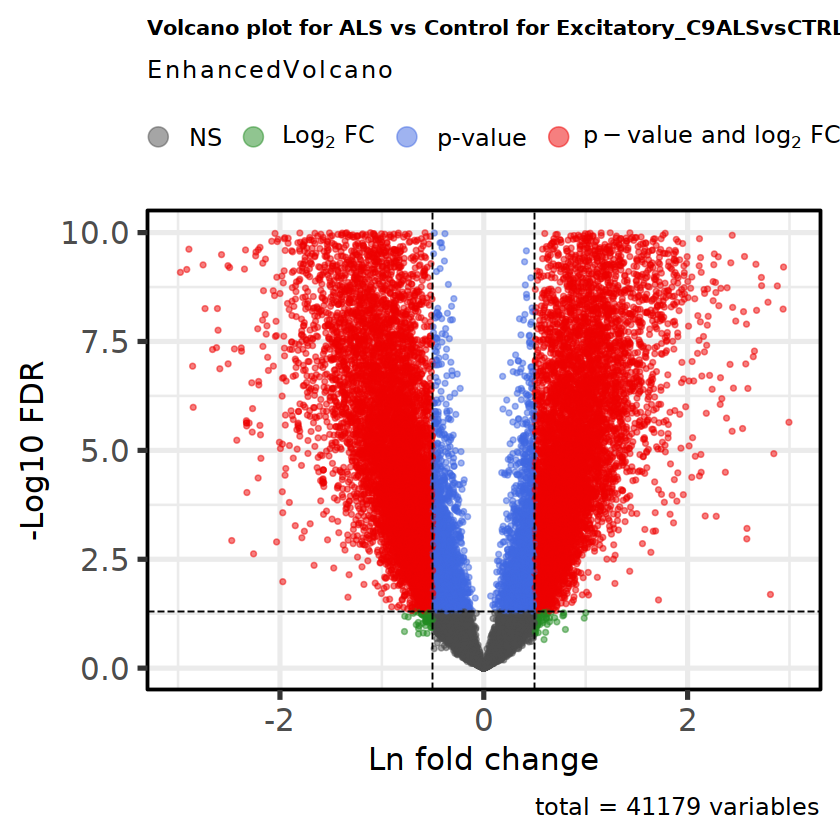

In [22]:
re_plot_volcanos <- function(ct){
    
    root_dir <- "/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/"
    ## read in and process the count dataframe
    inp_df <- read.csv(paste0(ct,"/APAlog_res.tsv"), sep='\t')
    top_n_switches <- inp_df %>% arrange(desc(abs(b_ConditionALS_pathology))) %>% slice(1:50)
    top_n_switches_genes <- top_n_switches['transcript']
    plt <- volcano_plot_2(inp_df,
                     x='b_ConditionALS_pathology',
                     y='p_ConditionALS_pathology',
                     title=paste0('Volcano plot for ALS vs Control for ',ct),
                     pCutoff = 0.05,
                     FCcutoff = .5,
                     ylim=c(0,10), pointsize = 1, top_n=top_n_switches_genes)
    # plot_name <- paste0(root_dir,ct,"/APAlog_volcano_plot_3.pdf")
    # pdf(file = plot_name)
    # print(plt) 
    # dev.off()
    return(plt)
}
re_plot_volcanos('Excitatory_C9ALSvsCTRL')

Warning message:
“Ignoring unknown parameters: xlim, ylim”


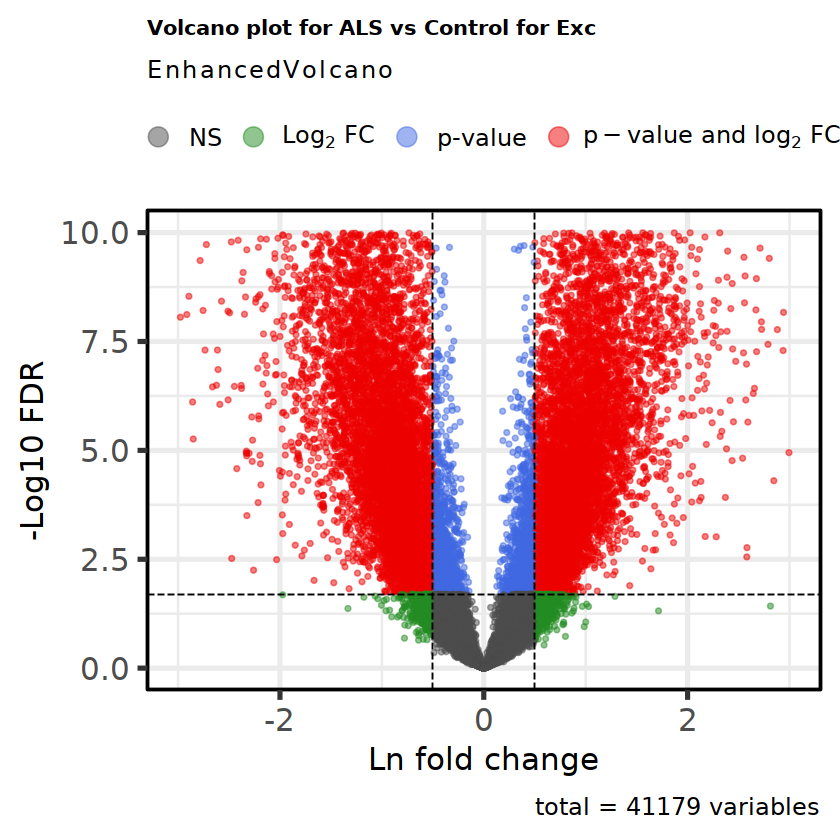

In [41]:
top_n_switches <- inp_df %>% arrange(desc(abs(b_ConditionALS_pathology))) %>% slice(1:50)
top_n_switches_genes <- top_n_switches['transcript']
plt <- volcano_plot_2(inp_df,
                     x='b_ConditionALS_pathology',
                     y='fdr_p_ConditionALS_pathology',
                     title=paste0('Volcano plot for ALS vs Control for ','Exc'),
                     pCutoff = 0.02,
                     FCcutoff = .5,
                     ylim=c(0,10), pointsize = 1,top_n=top_n_switches)
plt

In [40]:
sort the inp_df with the adjusted pvalues ascending and then find the row where the adjusted pvalue is greater than 0.05
inp_df <- inp_df %>% arrange(fdr_p_ConditionALS_pathology)
inp_df[which(inp_df$fdr_p_ConditionALS_pathology > 0.05),]

,transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_ConditionALS_pathology,p_ConditionALS_pathology,fdr_p_ConditionALS_pathology
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23240,CBFA2T2,1.000000e+00,1.000000e+00,chr20:33526555:+,chr20:33649078:+,-0.38593548,2.638728e-02,0.5048290,0.02823745,0.05003156
23241,PCNT,1.000000e+00,1.000000e+00,chr21:46423604:+,chr21:46442693:+,0.99944109,1.069809e-13,-0.4358867,0.02824790,0.05004792
23242,GNB5,1.000000e+00,1.000000e+00,chr15:52115105:-,chr15:52121611:-,0.80060633,1.649384e-16,0.2951283,0.02825210,0.05005321
23243,STOX2,1.000000e+00,1.000000e+00,chr4:184023161:+,chr4:184023526:+,0.77542168,1.264589e-09,0.3649424,0.02825649,0.05005884
23244,STX6,9.283100e-01,1.000000e+00,chr1:180973028:-,chr1:180982730:-,-0.33747777,1.037915e-02,0.4001489,0.02826406,0.05007009
23245,EML2,1.087821e-07,9.771822e-07,chr19:45624048:-,chr19:45638869:-,0.57069669,6.614586e-03,-0.5706967,0.02826598,0.05007134
23246,HSPD1,1.000000e+00,1.000000e+00,chr2:197488403:-,chr2:197497298:-,-0.45147138,1.119774e-05,-0.3565561,0.02827078,0.05007768
23247,XYLB,1.000000e+00,1.000000e+00,chr3:38402936:+,chr3:38411566:+,0.03367322,8.070728e-01,-0.5283695,0.02829083,0.05011105
23248,CHPT1,1.000000e+00,1.000000e+00,chr12:101726549:+,chr12:101729068:+,-0.44349250,2.543142e-04,-0.3382081,0.02832013,0.05015910
